In [65]:
import statistics 
import seaborn as sns
import numpy
import matplotlib.pyplot as plt

In [2]:
lst = [30, 55, 3, 10, 2]

Mean 
The sum of all values divided by the total number of values. It is the most commonly used measure of central tendency. However, the mean is sensitive to outliers, which are values that are unusually larger or smaller than the rest of the data.

In [4]:
average = statistics.mean(lst)
print("Average: ", round(average,3))

Average:  20


In [7]:
mean = sum(lst) / len(lst)
print(mean)

20.0


Median
The middle number in an ordered dataset. In a skewed distribution, the median is generally considered to be the best representative of the central location of the data. 

In [5]:
print(statistics.median(lst))

10


In [48]:
a = sorted(lst)
n = len(a)
if n % 2 == 1:
    meadian =(sorted_data[n // 2])
    print(meadian)
else:
    meadian=((sorted_data[n // 2 - 1] + sorted_data[n // 2]) / 2)
    print(meadian)

10


Mode
The most frequent value. In a skewed distribution, the mode lies in the hump of the distribution.

In [6]:
print(statistics.mode(lst))

30


Range
The range is the simplest measure of dispersion. It is the difference between the maximum and minimum values in a data set.b

In [14]:
print(max(lst) - min(lst))

53


Variance 
Variance is a statistical measure that quantifies the spread or dispersion of a set of data points. It indicates how much the individual data points in a dataset differ from the mean (average) of the dataset


variance_lst = []
for i in lst:
    varience_ele= (i-mean)**2
    variance_lst.append(varience_ele)
variance = sum(variance_lst) / (len(variance_lst)-1)
print(variance)


Standard deviation
Standard deviation is a measure used in statistics to understand how the data points in a set are spread out from the mean value. It indicates the extent of the data’s variation and shows how far individual data points deviate from the average.

In [53]:
standard_deviation = (variance)**0.5
standard_deviation2 = (variance)**(1/2)
print(standard_deviation2)
print(standard_deviation)

22.572106680591425
22.572106680591425


Interquartile Range
IQR in Statistics is used to measure variability by dividing a data set into quartiles. The data is sorted in ascending order and split into 4 equal parts. Q1, Q2, Q3 called first, second and third quartiles in the given data.

Q1 represents the 25th percentile of the data.
Q2 represents the 50th percentile of the data.
Q3 represents the 75th percentile of the data.

In [64]:
def percentile(data, percentile_rank):
    sorted_data = sorted(data)
    index = (percentile_rank / 100) * (len(sorted_data) - 1)
    lower_index = int(index)
    upper_index = lower_index + 1
    if upper_index < len(sorted_data):
        return sorted_data[lower_index] + (index - lower_index) * (sorted_data[upper_index] - sorted_data[lower_index])
    else:
        return sorted_data[lower_index]


Q1 = percentile(lst, 25)
Q3 = percentile(lst, 75)

IQR = Q3 - Q1


print(IQR)



27.0


In statistics, a percentile is a measure used to indicate the value below which a given percentage of observations in a group of observations fall.

In [62]:
print(Q1)
print(Q3)

3.0
30.0


Histograms
Group data into ranges and plot the frequency of data in each range. Histograms are best for analyzing the distribution of a single group of data, and for understanding the overall shape of the data. They can help identify modes (peaks) and understand if the data is normal, skewed, or bimodal.

<Axes: ylabel='Count'>

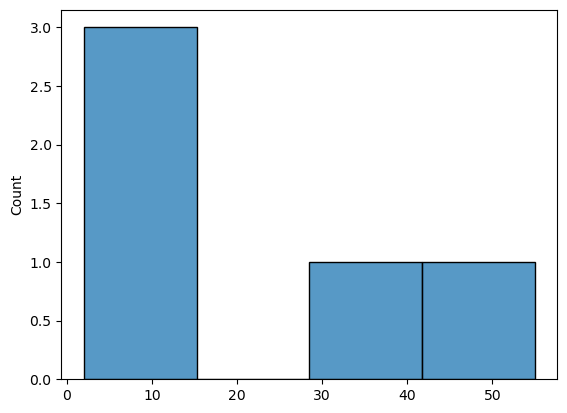

In [66]:
sns.histplot(lst)

<Axes: >

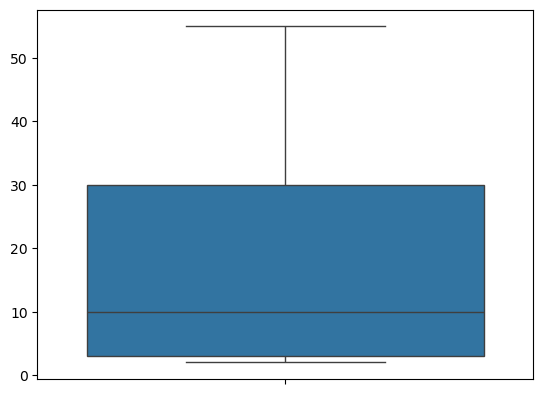

In [67]:
sns.boxplot(lst)

Outliers (Z-Score): [80. 90.]


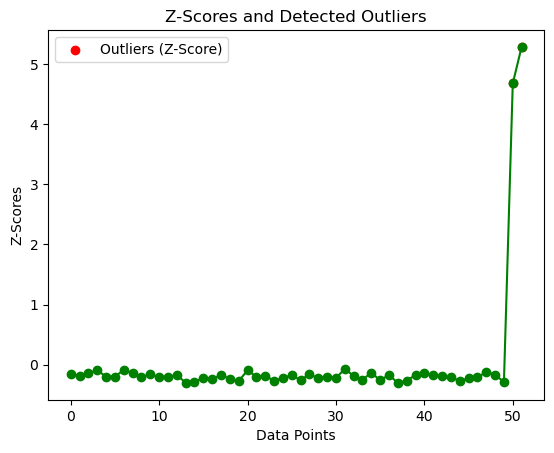

In [4]:
np.random.seed(42)
data_normal = np.random.normal(loc=0, scale=1, size=50)
data_with_outliers = np.concatenate([data_normal, [80, 90]])
mean_normal = np.mean(data_with_outliers)
std_normal = np.std(data_with_outliers)

z_scores = (data_with_outliers - mean_normal) / std_normal

outlier_threshold_z = 3

outliers_z = np.where(np.abs(z_scores) > outlier_threshold_z)[0]
plt.plot(z_scores, marker='o', linestyle='-', color='green')
plt.scatter(outliers_z, z_scores[outliers_z], color='red', label='Outliers (Z-Score)')
plt.title("Z-Scores and Detected Outliers")
plt.xlabel("Data Points")
plt.ylabel("Z-Scores")
plt.legend()
print("Outliers (Z-Score):", data_with_outliers[outliers_z])


[80.0, 90.0]


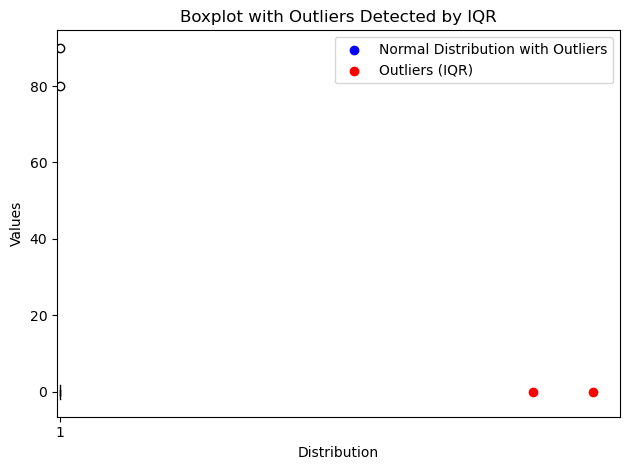

In [3]:
sorted_data = np.sort(data_with_outliers)
Q1 = np.percentile(sorted_data, 25)
Q3 = np.percentile(sorted_data, 75)
IQR = Q3 - Q1
lower_bound_iqr = max(min(sorted_data), Q1 - 1.5 * IQR)
upper_bound_iqr = min(max(sorted_data), Q3 + 1.5 * IQR)
outliers_iqr = [point for point in data_with_outliers if point < lower_bound_iqr or point > upper_bound_iqr]

print (outliers_iqr)

plt.boxplot(data_with_outliers)
plt.scatter([], [], color='blue', label='Normal Distribution with Outliers')
plt.scatter(outliers_iqr, [0] * len(outliers_iqr), color='red', label='Outliers (IQR)')
plt.title("Boxplot with Outliers Detected by IQR")
plt.xlabel("Distribution")
plt.ylabel("Values")
plt.legend()
plt.tight_layout()
plt.show()
